# Host Specialization

This script combines the output of three different entropy calculation scripts.

## Import pre-computed data

In [1]:
import pandas as pd
ip_entropies = pd.read_csv('./entropies/ip_entropies.csv', index_col=0)
asn_entropies = pd.read_csv('./entropies/as_entropies.csv', index_col=0)
cc_entropies = pd.read_csv('./entropies/cc_entropies.csv', index_col=0)

## CDF plotting function

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def cdf(data, m, n, s, lstring):

    data_size=len(data)

    # Set bins edges
    data_set=sorted(set(data))
    bins=np.append(data_set, data_set[-1]+1)

    # Use the histogram function to bin the data
    counts, bin_edges = np.histogram(data, bins=bins,density=False)
    counts=counts.astype(float)/data_size

    # Find the cdf
    cdf = np.cumsum(counts)
    
    # Plot the cdf
    plt.plot(bin_edges[0:-1], cdf, linestyle='%s'%n,
             color='%s'%m, label=lstring)    
    plt.ylim((0,1))

## plotting code

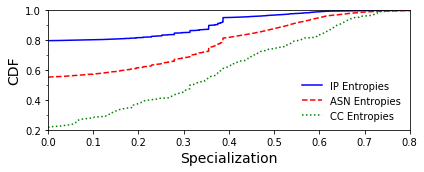

In [6]:
plt.figure(figsize=(6,2.5))

stat = 'Shannon Entropy'
cdf(ip_entropies[stat].transpose().values,
    'b', '-', '.', "IP Entropies")
cdf(asn_entropies[stat].transpose().values,
    'r', '--', '.', "ASN Entropies")
cdf(cc_entropies[stat].transpose().values,
    'g', ':', '.', "CC Entropies")

plt.ylabel("CDF",fontsize=14)
plt.xlabel("Specialization",fontsize=14)

plt.ylim(0.2, 1)
plt.xlim(0, 0.8)
plt.legend(loc='lower right', frameon=False)

from matplotlib.ticker import MultipleLocator
minorLocator = MultipleLocator(0.1)
plt.gca().yaxis.set_minor_locator(minorLocator)

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

plt.savefig("special-host-entropy.pdf")
plt.show()